# HW4-Kenwan

### GOAL: Create classification model, predicting the outcome of food safety inspection based on the inspectors’ comments

### Details:

1. Leverage the results of your homework from Week-1 and Week-2 to extract free-form text comments from inspectors/ Discard the text from “Health Code” – only keep inspectors’ comments.
2. Build classification model, predicting the outcome of inspection – your target variable is “Results”
3. Explain why you selected a particular text pre-processing technique
4. Visualize results of at least two text classifiers and select the most robust one. You can choose to build a binary classifier (limiting your data to Pass / Fail) or multinomial classifier with all available values in Results

### Import packages

In [14]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Boog\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
import nltk
import string
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from itertools import combinations
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [11]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

### Load the data in

In [12]:
dir_b = '../wk3/Assignment 3 Books/'
dir_a = '../wk3/Assignment 3 Articles/'

In [16]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir_b,ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

### We've run the function to load the data and run ngrams

The function returns the jaccard similarity (intersection / (total - intersection)) of the lists. We can plot them below.

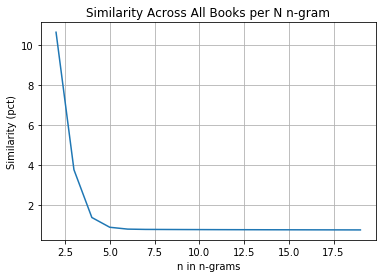

In [17]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()